In [1]:
from PIL import Image
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import warnings

import pandas as pd, numpy as np, string
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('dataset/good_reads_final.csv')


In [3]:
dataset.columns

Index(['author_average_rating', 'author_gender', 'author_genres', 'author_id',
       'author_name', 'author_page_url', 'author_rating_count',
       'author_review_count', 'birthplace', 'book_average_rating',
       'book_fullurl', 'book_id', 'book_title', 'genre_1', 'genre_2',
       'num_ratings', 'num_reviews', 'pages', 'publish_date', 'score'],
      dtype='object')

In [4]:
X = dataset[dataset.author_gender=='female']
X['book_title'] = X['book_title'].astype(str)
X = X['book_title']
X1 = X.to_string()

In [5]:
wordcloud1 = WordCloud(max_font_size=100, max_words=80, background_color="white").generate(X1)

In [6]:
Y = dataset[dataset.author_gender=='male']
Y['book_title'] = Y['book_title'].astype(str)
Y = Y['book_title']
Y1 = Y.to_string()

In [7]:
wordcloud2 = WordCloud(max_font_size=100, max_words=80, background_color="white").generate(Y1)

In [8]:
wordclouds = [wordcloud1, wordcloud2]

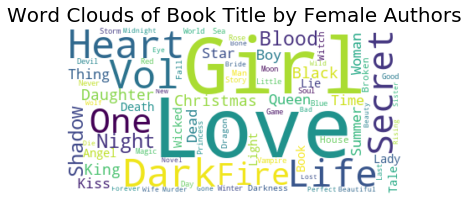

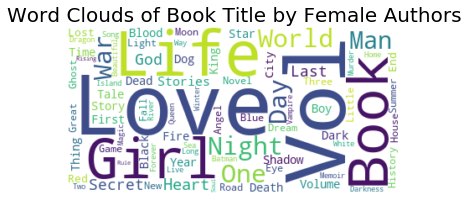

In [9]:
for wc in wordclouds:
    plt.imshow(wc, interpolation='bilinear')
    if wc == wordcloud1:
        plt.title('Word Clouds of Book Title by Female Authors', fontsize = 20)
    if wc == wordcloud2:
        plt.title('Word Clouds of Book Title by Female Authors', fontsize = 20)        
    plt.axis("off")
    plt.show()

### By gender book now

In [10]:
dataset['genre_1']

0        Mystery
1        Fiction
2        Romance
3        Fiction
4        Fantasy
          ...   
22886    Fantasy
22887    Romance
22888    Fantasy
22889    Fantasy
22890    Fantasy
Name: genre_1, Length: 22891, dtype: object

In [11]:
top5gender = pd.value_counts(dataset['genre_1'])
top5gender = top5gender.nlargest(n=5)

In [12]:
top5gender = top5gender.index.tolist()

In [13]:
listCloud =[]
for i in range(0, len(top5gender)):
    df = dataset[dataset.genre_1==top5gender[i]]
    df['book_title'] = df['book_title'].astype(str)
    df = df['book_title']
    df = df.to_string()
    wordcloud = WordCloud(max_font_size=100, max_words=80, background_color="white").generate(df)
    listCloud.append(wordcloud)

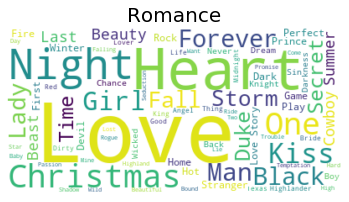

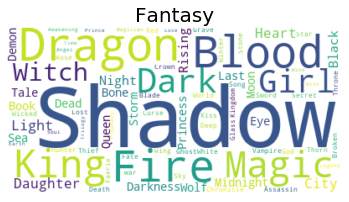

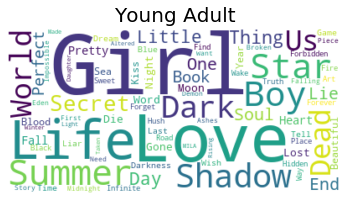

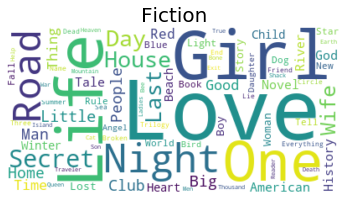

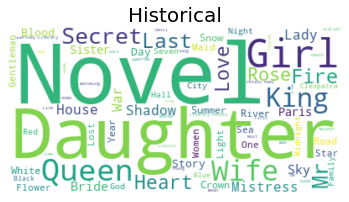

In [14]:
for i in range(0, len(listCloud)):
    plt.imshow(listCloud[i], interpolation='bilinear')
    plt.title(top5gender[i], fontsize = 20)
    plt.axis("off")
    plt.show()